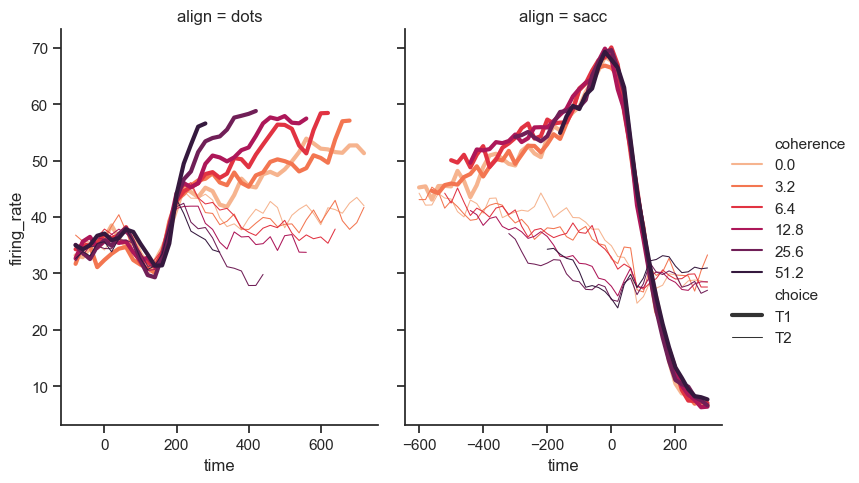

In [1]:
import seaborn as sns
sns.set_theme(style="ticks")

dots = sns.load_dataset("dots")

# Define the palette as a list to specify exact values
palette = sns.color_palette("rocket_r")

# Plot the lines on two facets
sns.relplot(
    data=dots,
    x="time", y="firing_rate",
    hue="coherence", size="choice", col="align",
    kind="line", size_order=["T1", "T2"], palette=palette,
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

In [6]:
import plotly.graph_objects as go
import numpy as np

fig = go.Figure(data=go.Scatter(
    y = np.random.randn(500),
    mode='markers',
    marker=dict(
        size=16,
        color=np.random.randn(500), #set color equal to a variable
        colorscale='Viridis', # one of plotly colorscales
        showscale=True
    )
))

fig.show()

In [8]:
import plotly.express as px
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

<Axes: >

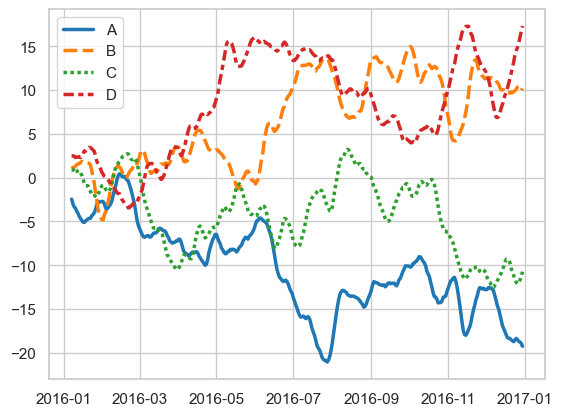

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

rs = np.random.RandomState(365)
values = rs.randn(365, 4).cumsum(axis=0)
dates = pd.date_range("1 1 2016", periods=365, freq="D")
data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
data = data.rolling(7).mean()

sns.lineplot(data=data, palette="tab10", linewidth=2.5)

In [18]:
import plotly.graph_objects as go
import numpy as np

x_data = ['Carmelo Anthony', 'Dwyane Wade',
          'Deron Williams', 'Brook Lopez',
          'Damian Lillard', 'David West',]

N = 50

y0 = (10 * np.random.randn(N) + 30).astype(int)
y1 = (13 * np.random.randn(N) + 38).astype(int)
y2 = (11 * np.random.randn(N) + 33).astype(int)
y3 = (9 * np.random.randn(N) + 36).astype(int)
y4 = (15 * np.random.randn(N) + 31).astype(int)
y5 = (12 * np.random.randn(N) + 40).astype(int)

y_data = [y0, y1, y2, y3, y4, y5]

colors = ['rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)', 'rgba(44, 160, 101, 0.5)',
          'rgba(255, 65, 54, 0.5)', 'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)']

fig = go.Figure()

for xd, yd, cls in zip(x_data, y_data, colors):
        fig.add_trace(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker_size=2,
            line_width=1)
        )

fig.update_layout(
    title=dict(text='Points Scored by the Top 9 Scoring NBA Players in 2012'),
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)

fig.show()

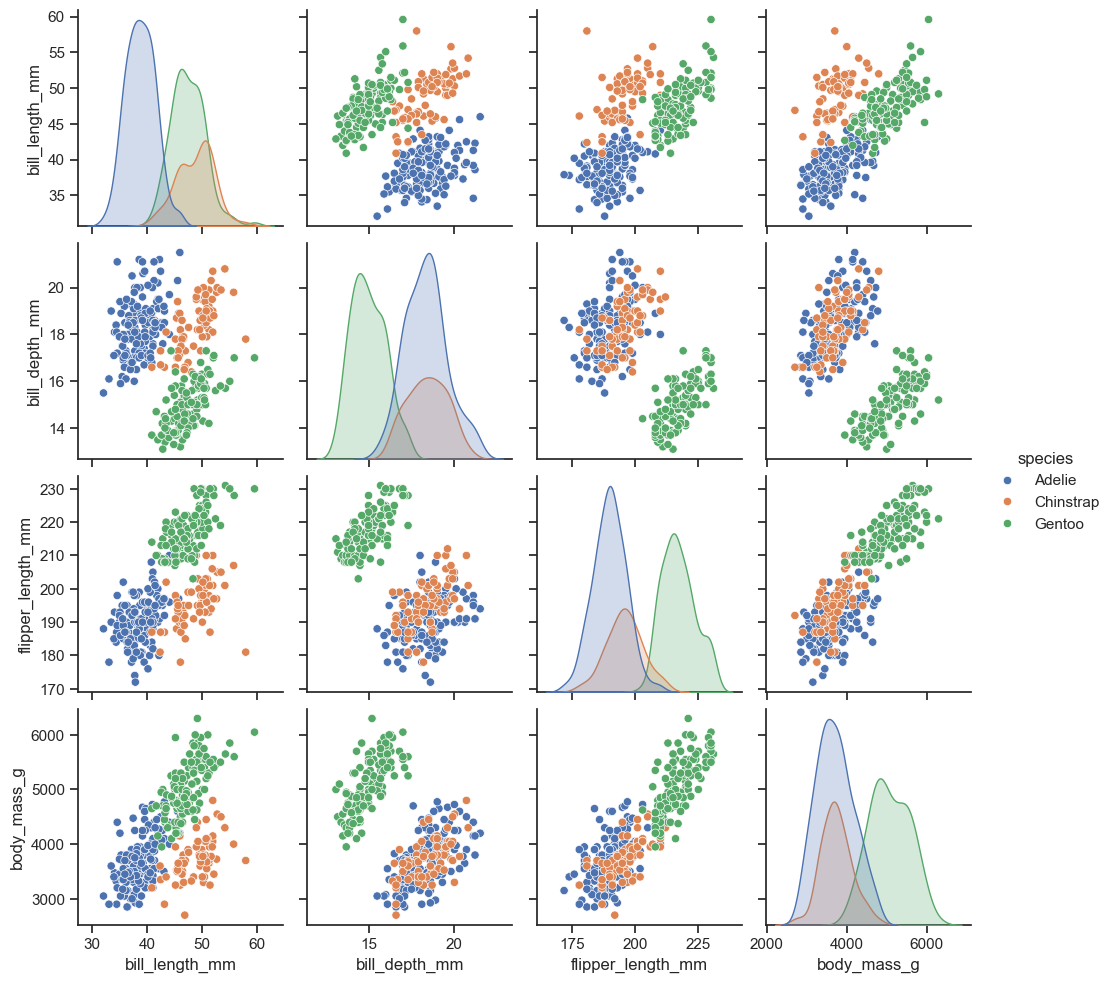

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

df = sns.load_dataset("penguins")
sns.pairplot(df, hue="species")

In [19]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

rs = np.random.RandomState()
rs.seed(0)

def brownian_motion(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = rs.standard_normal(size = N)
    W = np.cumsum(W)*np.sqrt(dt) # standard brownian motion
    X = (mu-0.5*sigma**2)*t + sigma*W
    S = S0*np.exp(X) # geometric brownian motion
    return S

dates = pd.date_range('2012-01-01', '2013-02-22')
T = (dates.max()-dates.min()).days / 365
N = dates.size
start_price = 100
y = brownian_motion(T, N, sigma=0.1, S0=start_price)
z = brownian_motion(T, N, sigma=0.1, S0=start_price)

fig = go.Figure(data=go.Scatter3d(
    x=dates, y=y, z=z,
    marker=dict(
        size=4,
        color=z,
        colorscale='Viridis',
    ),
    line=dict(
        color='darkblue',
        width=2
    )
))

fig.update_layout(
    width=800,
    height=700,
    autosize=False,
    scene=dict(
        camera=dict(
            up=dict(
                x=0,
                y=0,
                z=1
            ),
            eye=dict(
                x=0,
                y=1.0707,
                z=1,
            )
        ),
        aspectratio = dict( x=1, y=1, z=0.7 ),
        aspectmode = 'manual'
    ),
)

fig.show()

In [20]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/streamtube-wind.csv').drop(['Unnamed: 0'],axis=1)

fig = go.Figure(data=go.Streamtube(
    x = df['x'],
    y = df['y'],
    z = df['z'],
    u = df['u'],
    v = df['v'],
    w = df['w'],
    starts = dict(
        x = [80] * 16,
        y = [20,30,40,50] * 4,
        z = [0,0,0,0,5,5,5,5,10,10,10,10,15,15,15,15]
    ),
    sizeref = 0.3,
    colorscale = 'Portland',
    showscale = False,
    maxdisplayed = 3000
))

fig.update_layout(
    scene = dict(
        aspectratio = dict(
            x = 2,
            y = 1,
            z = 0.3
        )
    ),
    margin = dict(
        t = 20,
        b = 20,
        l = 20,
        r = 20
    )
)

fig.show()

In [21]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Add traces
fig.add_trace(go.Scatter(
    x=["2013-01-15", "2013-01-29", "2013-02-26", "2013-04-19", "2013-07-02",
       "2013-08-27",
       "2013-10-22", "2014-01-20", "2014-05-05", "2014-07-01", "2015-02-09",
       "2015-04-13",
       "2015-05-13", "2015-06-08", "2015-08-05", "2016-02-25"],
    y=["8", "3", "2", "10", "5", "5", "6", "8", "3", "3", "7", "5", "10", "10", "9",
       "14"],
    name="var0",
    text=["8", "3", "2", "10", "5", "5", "6", "8", "3", "3", "7", "5", "10", "10", "9",
          "14"],
    yaxis="y",
))

fig.add_trace(go.Scatter(
    x=["2015-04-13", "2015-05-13", "2015-06-08", "2015-08-05", "2016-02-25"],
    y=["53.0", "69.0", "89.0", "41.0", "41.0"],
    name="var1",
    text=["53.0", "69.0", "89.0", "41.0", "41.0"],
    yaxis="y2",
))

fig.add_trace(go.Scatter(
    x=["2013-01-29", "2013-02-26", "2013-04-19", "2013-07-02", "2013-08-27",
       "2013-10-22",
       "2014-01-20", "2014-04-09", "2014-05-05", "2014-07-01", "2014-09-30",
       "2015-02-09",
       "2015-04-13", "2015-06-08", "2016-02-25"],
    y=["9.6", "4.6", "2.7", "8.3", "18", "7.3", "3", "7.5", "1.0", "0.5", "2.8", "9.2",
       "13", "5.8", "6.9"],
    name="var2",
    text=["9.6", "4.6", "2.7", "8.3", "18", "7.3", "3", "7.5", "1.0", "0.5", "2.8",
          "9.2",
          "13", "5.8", "6.9"],
    yaxis="y3",
))

fig.add_trace(go.Scatter(
    x=["2013-01-29", "2013-02-26", "2013-04-19", "2013-07-02", "2013-08-27",
       "2013-10-22",
       "2014-01-20", "2014-04-09", "2014-05-05", "2014-07-01", "2014-09-30",
       "2015-02-09",
       "2015-04-13", "2015-06-08", "2016-02-25"],
    y=["6.9", "7.5", "7.3", "7.3", "6.9", "7.1", "8", "7.8", "7.4", "7.9", "7.9", "7.6",
       "7.2", "7.2", "8.0"],
    name="var3",
    text=["6.9", "7.5", "7.3", "7.3", "6.9", "7.1", "8", "7.8", "7.4", "7.9", "7.9",
          "7.6",
          "7.2", "7.2", "8.0"],
    yaxis="y4",
))

fig.add_trace(go.Scatter(
    x=["2013-02-26", "2013-07-02", "2013-09-26", "2013-10-22", "2013-12-04",
       "2014-01-02",
       "2014-01-20", "2014-05-05", "2014-07-01", "2015-02-09", "2015-05-05"],
    y=["290", "1078", "263", "407", "660", "740", "33", "374", "95", "734", "3000"],
    name="var4",
    text=["290", "1078", "263", "407", "660", "740", "33", "374", "95", "734", "3000"],
    yaxis="y5",
))

# style all the traces
fig.update_traces(
    hoverinfo="name+x+text",
    line={"width": 0.5},
    marker={"size": 8},
    mode="lines+markers",
    showlegend=False
)

# Add annotations
fig.update_layout(
    annotations=[
        dict(
            x="2013-06-01",
            y=0,
            arrowcolor="rgba(63, 81, 181, 0.2)",
            arrowsize=0.3,
            ax=0,
            ay=30,
            text="state1",
            xref="x",
            yanchor="bottom",
            yref="y"
        ),
        dict(
            x="2014-09-13",
            y=0,
            arrowcolor="rgba(76, 175, 80, 0.1)",
            arrowsize=0.3,
            ax=0,
            ay=30,
            text="state2",
            xref="x",
            yanchor="bottom",
            yref="y"
        )
    ],
)

# Add shapes
fig.update_layout(
    shapes=[
        dict(
            fillcolor="rgba(63, 81, 181, 0.2)",
            line={"width": 0},
            type="rect",
            x0="2013-01-15",
            x1="2013-10-17",
            xref="x",
            y0=0,
            y1=0.95,
            yref="paper"
        ),
        dict(
            fillcolor="rgba(76, 175, 80, 0.1)",
            line={"width": 0},
            type="rect",
            x0="2013-10-22",
            x1="2015-08-05",
            xref="x",
            y0=0,
            y1=0.95,
            yref="paper"
        )
    ]
)

# Update axes
fig.update_layout(
    xaxis=dict(
        autorange=True,
        range=["2012-10-31 18:36:37.3129", "2016-05-10 05:23:22.6871"],
        rangeslider=dict(
            autorange=True,
            range=["2012-10-31 18:36:37.3129", "2016-05-10 05:23:22.6871"]
        ),
        type="date"
    ),
    yaxis=dict(
        anchor="x",
        autorange=True,
        domain=[0, 0.2],
        linecolor="#673ab7",
        mirror=True,
        range=[-60.0858369099, 28.4406294707],
        showline=True,
        side="right",
        tickfont={"color": "#673ab7"},
        tickmode="auto",
        ticks="",
        title=dict(
            font=dict(
                color="#673ab7"
            )
        ),
        type="linear",
        zeroline=False
    ),
    yaxis2=dict(
        anchor="x",
        autorange=True,
        domain=[0.2, 0.4],
        linecolor="#E91E63",
        mirror=True,
        range=[29.3787777032, 100.621222297],
        showline=True,
        side="right",
        tickfont={"color": "#E91E63"},
        tickmode="auto",
        ticks="",
        title=dict(
            font=dict(
                color="#E91E63"
            )
        ),
        type="linear",
        zeroline=False
    ),
    yaxis3=dict(
        anchor="x",
        autorange=True,
        domain=[0.4, 0.6],
        linecolor="#795548",
        mirror=True,
        range=[-3.73690396239, 22.2369039624],
        showline=True,
        side="right",
        tickfont={"color": "#795548"},
        tickmode="auto",
        ticks="",
        title=dict(
            text="mg/L",
            font=dict(
                color="#795548"
            )
        ),
        type="linear",
        zeroline=False
    ),
    yaxis4=dict(
        anchor="x",
        autorange=True,
        domain=[0.6, 0.8],
        linecolor="#607d8b",
        mirror=True,
        range=[6.63368032236, 8.26631967764],
        showline=True,
        side="right",
        tickfont={"color": "#607d8b"},
        tickmode="auto",
        ticks="",
        title=dict(
            text="mmol/L",
            font=dict(
                color="#607d8b"
            )
        ),
        type="linear",
        zeroline=False
    ),
    yaxis5=dict(
        anchor="x",
        autorange=True,
        domain=[0.8, 1],
        linecolor="#2196F3",
        mirror=True,
        range=[-685.336803224, 3718.33680322],
        showline=True,
        side="right",
        tickfont={"color": "#2196F3"},
        tickmode="auto",
        ticks="",
        title=dict(
            text="mg/Kg",
            font=dict(
                color="#2196F3"
            )
        ),
        type="linear",
        zeroline=False
    )
)

# Update layout
fig.update_layout(
    dragmode="zoom",
    hovermode="x",
    legend=dict(traceorder="reversed"),
    height=600,
    template="plotly_white",
    margin=dict(
        t=100,
        b=100
    ),
)

fig.show()